In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.style.use('fivethirtyeight')

In [13]:
teams_master = pd.read_csv('../Data/Teams/teams_master.csv')

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
teams_master.head()

,Unnamed: 0,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,PO_WINS,PO_LOSSES,CONF_COUNT,DIV_COUNT,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK,FG2M,FG2A,FG2_PCT,FG3A/FGA,FG2A/FGA,FTA/FGA,FG3A/FG2A,FG2M_PER_GP,FG3M_PER_GP,FG2A_PER_GP,FG3A_PER_GP,PTS_PER_GP,3PT_PER_PTS,2PT_PER_PTS,PLAYOFFS,CHAMPS,FINALS_LOSS,FINALS_APPEARANCE
0,34,1610612755,Philadelphia,76ers,1983-01-01,82,52,30,0.634,3,2,2,3,11.0,5,NaN,3384,6833,0.495,29,107,0.271,2041,2706,0.754,1181,2382,3563,2032,2040,807,1628,653,8838,16,3355,6726,0.498811,0.015659,0.984341,0.396019,0.015908,40.914634,0.353659,82.024390,1.304878,107.780488,0.009844,0.759222,1,0,0,0
1,35,1610612755,Philadelphia,76ers,1984-01-01,82,58,24,0.707,3,2,8,5,11.0,5,NaN,3443,6992,0.492,59,224,0.263,2316,2883,0.803,1301,2364,3665,1999,1971,817,1575,534,9261,8,3384,6768,0.500000,0.032037,0.967963,0.412328,0.033097,41.268293,0.719512,82.536585,2.731707,112.939024,0.019112,0.730807,1,0,0,0
2,36,1610612755,Philadelphia,76ers,1985-01-01,82,54,28,0.659,3,2,6,6,11.0,5,NaN,3435,7058,0.487,51,224,0.228,2130,2810,0.758,1326,2378,3704,2017,1798,862,1595,490,9051,11,3384,6834,0.495171,0.031737,0.968263,0.398130,0.032777,41.268293,0.621951,83.341463,2.731707,110.378049,0.016904,0.747763,1,0,0,0
3,37,1610612755,Philadelphia,76ers,1986-01-01,82,45,37,0.549,5,2,2,3,11.0,5,NaN,3335,6792,0.491,88,340,0.259,1971,2617,0.753,1178,2327,3505,1943,1774,768,1519,540,8729,17,3247,6452,0.503255,0.050059,0.949941,0.385306,0.052697,39.597561,1.073171,78.682927,4.146341,106.451220,0.030244,0.743957,1,0,0,0
4,38,1610612755,Philadelphia,76ers,1987-01-01,82,36,46,0.439,10,4,0,0,11.0,5,NaN,3214,6785,0.474,152,471,0.323,2087,2731,0.764,1219,2307,3526,1897,1866,672,1433,465,8667,16,3062,6314,0.484954,0.069418,0.930582,0.402506,0.074596,37.341463,1.853659,77.000000,5.743902,105.695122,0.052613,0.706588,0,0,0,0


In [79]:
teams_master['FTM_PER_GP']=teams_master['FTM']/teams_master['GP']
teams_master['FTA_PER_GP']=teams_master['FTA']/teams_master['GP']
teams_master['OREB_PER_GP']=teams_master['OREB']/teams_master['GP']
teams_master['DREB_PER_GP']=teams_master['DREB']/teams_master['GP']
teams_master['REB_PER_GP']=teams_master['REB']/teams_master['GP']
teams_master['AST_PER_GP']=teams_master['AST']/teams_master['GP']
teams_master['PF_PER_GP']=teams_master['PF']/teams_master['GP']
teams_master['STL_PER_GP']=teams_master['STL']/teams_master['GP']
teams_master['TOV_PER_GP']=teams_master['TOV']/teams_master['GP']
teams_master['BLK_PER_GP']=teams_master['BLK']/teams_master['GP']

In [16]:
# Create column with normalized wins in 82 game season to account for two lockout seasons

teams_master['Wins'] = teams_master['WINS']/teams_master['GP']*82
teams_master['FGA_PER_GP'] = teams_master['FGA']/teams_master['GP']

In [17]:
heatmap=teams_master[['Wins','FG_PCT','FG2_PCT','FG3_PCT','FT_PCT','FGA_PER_GP','FG2A_PER_GP','FG3A_PER_GP','PTS_PER_GP','FG3A/FG2A']]

In [18]:
corrs = heatmap.corr()[['Wins']].sort_values(by='Wins',ascending=False)
corrs

,Wins
Wins,1.000000
FG2_PCT,0.521586
FG_PCT,0.488481
PTS_PER_GP,0.318351
FG3_PCT,0.261430
FT_PCT,0.180578
FG3A/FG2A,0.111671
FG3A_PER_GP,0.091241
FGA_PER_GP,-0.083745
FG2A_PER_GP,-0.113714


In [48]:
features = ['FG2_PCT','FG3_PCT','FT_PCT','FG2A_PER_GP','FG3A_PER_GP','FG3A/FG2A']
X = teams_master[features]
y = teams_master['Wins']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=69)

In [50]:
lr=LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lr.score(X_train,y_train)

0.40293932782699526

In [53]:
lr.score(X_test,y_test)

0.29463936349104336

In [59]:
ss=StandardScaler()
Z_train=ss.fit_transform(X_train)
Z_test=ss.transform(X_test)

In [61]:
lr.fit(Z_train,y_train)
lr.score(Z_train,y_train)

0.40293932782699526

In [64]:
lr.score(Z_test,y_test)

0.29463936349104414

In [66]:
r_alphas=np.logspace(0,5,100)
ridge_model=RidgeCV(alphas=r_alphas,scoring='r2',cv=5)
ridge_model=ridge_model.fit(Z_train,y_train)
print(f"Train R2 Score: {ridge_model.score(Z_train,y_train)}")
print(f" Test R2 Score: {ridge_model.score(Z_test,y_test)}")

Train R2 Score: 0.4028228993636327
 Test R2 Score: 0.2947414581828065


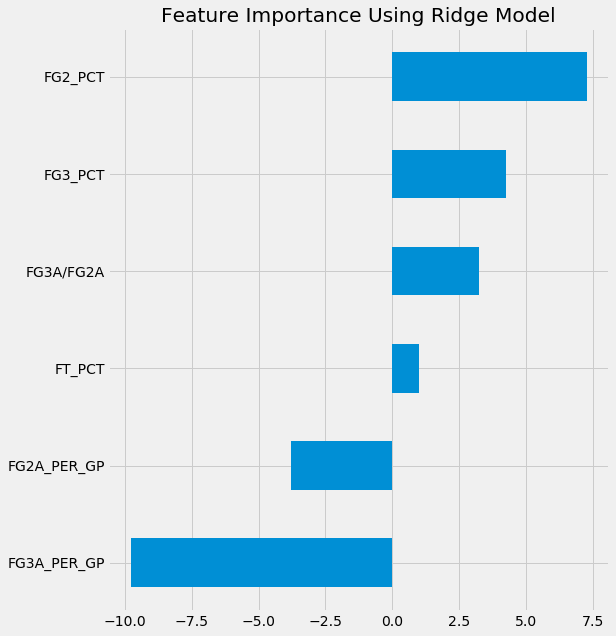

In [74]:
coef=pd.Series(ridge_model.coef_,index=X.columns)

imp_coef=coef.sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Ridge Model");

In [76]:
l_alphas=np.logspace(0,5,100)
lasso_model=LassoCV(alphas=l_alphas,cv=5,max_iter=5000)
lasso_model=ridge_model.fit(Z_train,y_train)
print(f"Train R2 Score: {lasso_model.score(Z_train,y_train)}")
print(f" Test R2 Score: {lasso_model.score(Z_test,y_test)}")

Train R2 Score: 0.4028228993636327
 Test R2 Score: 0.2947414581828065


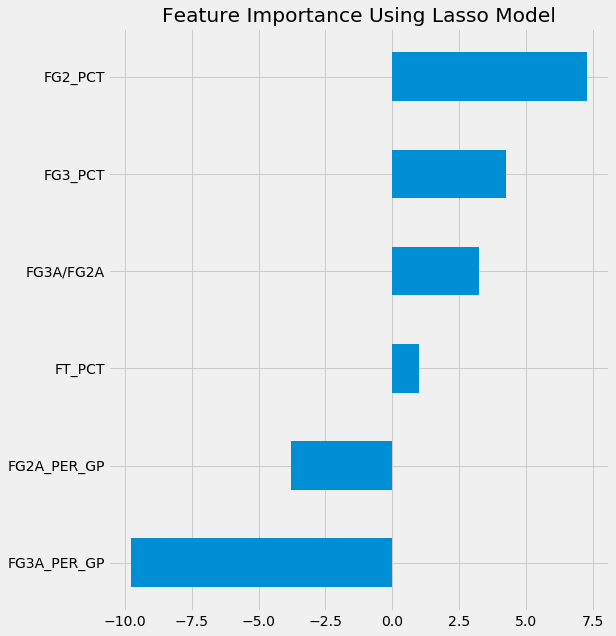

In [78]:
coef=pd.Series(lasso_model.coef_,index=X.columns)

imp_coef=coef.sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Lasso Model");

In [80]:
teams_master.columns

Index(['Unnamed: 0', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'YEAR', 'GP', 'WINS',
       'LOSSES', 'WIN_PCT', 'CONF_RANK', 'DIV_RANK', 'PO_WINS', 'PO_LOSSES',
       'CONF_COUNT', 'DIV_COUNT', 'NBA_FINALS_APPEARANCE', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'PF', 'STL', 'TOV', 'BLK', 'PTS', 'PTS_RANK',
       'FG2M', 'FG2A', 'FG2_PCT', 'FG3A/FGA', 'FG2A/FGA', 'FTA/FGA',
       'FG3A/FG2A', 'FG2M_PER_GP', 'FG3M_PER_GP', 'FG2A_PER_GP', 'FG3A_PER_GP',
       'PTS_PER_GP', '3PT_PER_PTS', '2PT_PER_PTS', 'PLAYOFFS', 'CHAMPS',
       'FINALS_LOSS', 'FINALS_APPEARANCE', 'Wins', 'FGA_PER_GP', 'FTM_PER_GP',
       'FTA_PER_GP', 'OREB_PER_GP', 'DREB_PER_GP', 'REB_PER_GP', 'AST_PER_GP',
       'PF_PER_GP', 'STL_PER_GP', 'TOV_PER_GP', 'BLK_PER_GP'],
      dtype='object')

In [81]:
feats=['FG2_PCT','FG3_PCT','FT_PCT','FG2M_PER_GP','FG2A_PER_GP','FG3M_PER_GP','FG3A_PER_GP','FTM_PER_GP','FTA_PER_GP','OREB_PER_GP','DREB_PER_GP','AST_PER_GP','PF_PER_GP','STL_PER_GP','TOV_PER_GP','BLK_PER_GP']
X=teams_master[feats]
y=teams_master['Wins']

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=69)

In [83]:
ss=StandardScaler()
Z_train=ss.fit_transform(X_train)
Z_test=ss.transform(X_test)

In [84]:
r_alphas=np.logspace(0,5,100)
ridge_model=RidgeCV(alphas=r_alphas,scoring='r2',cv=5)
ridge_model=ridge_model.fit(Z_train,y_train)
print(f"Train R2 Score: {ridge_model.score(Z_train,y_train)}")
print(f" Test R2 Score: {ridge_model.score(Z_test,y_test)}")

Train R2 Score: 0.7905393433676597
 Test R2 Score: 0.8189570223499358


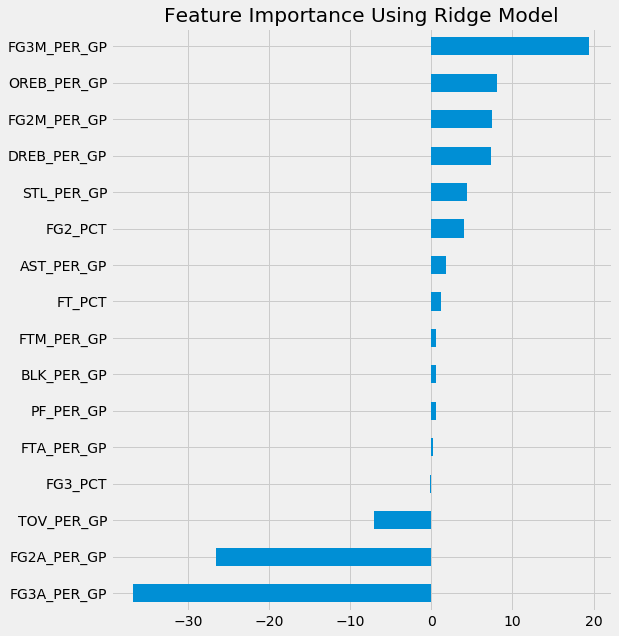

In [85]:
coef=pd.Series(ridge_model.coef_,index=X.columns)

imp_coef=coef.sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Ridge Model");

In [86]:
l_alphas=np.logspace(0,5,100)
lasso_model=LassoCV(alphas=l_alphas,cv=5,max_iter=5000)
lasso_model=ridge_model.fit(Z_train,y_train)
print(f"Train R2 Score: {lasso_model.score(Z_train,y_train)}")
print(f" Test R2 Score: {lasso_model.score(Z_test,y_test)}")

Train R2 Score: 0.7905393433676597
 Test R2 Score: 0.8189570223499358


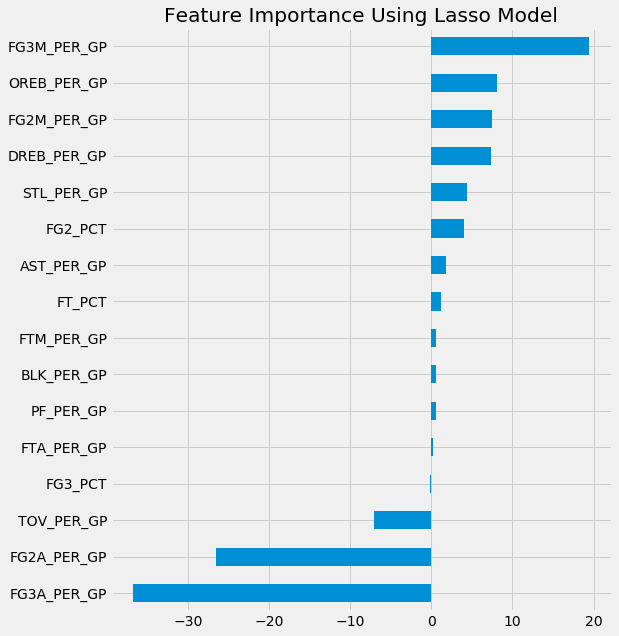

In [87]:
coef=pd.Series(lasso_model.coef_,index=X.columns)

imp_coef=coef.sort_values()

plt.plot(figsize=(10,8))
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Lasso Model");